In [5]:
import warnings
warnings.filterwarnings("default", category=DeprecationWarning)
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
from keras.models import Model, Sequential
from keras.layers import Input, Activation, Dense
from keras.optimizers import SGD

Using TensorFlow backend.
/opt/conda/lib/python3.7/site-packages/keras/callbacks/callbacks.py:19: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable


In [9]:
import keras
import pydot as pyd
keras.utils.vis_utils.pydot = pyd
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

In [10]:
# Generate data from -20, -19.75, -19.5, .... , 20
train_x = np.arange(-20, 20, 0.25)

# Calculate Target : sqrt(2x^2 + 1)
train_y = np.sqrt((2*train_x**2)+1)

In [11]:
# Create Network
inputs = Input(shape=(1,))
h_layer = Dense(8, activation='relu')(inputs) # 1*8 + 8 = 16
h_layer = Dense(4, activation='relu')(h_layer) # 8*4 + 4 = 36
outputs = Dense(1, activation='linear')(h_layer) # 4*1 + 1 = 5
model = Model(inputs=inputs, outputs=outputs)

In [12]:
(150*150*50)

1125000

In [13]:
# Optimizer / Update Rule
sgd = SGD(lr=0.001)
# Compile the model with Mean Squared Error Loss
model.compile(optimizer=sgd, loss='mse')
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 16        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


/opt/conda/lib/python3.7/site-packages/keras/engine/training_utils.py:811: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(loss, collections.Mapping):


In [15]:
!pip install GraphViz

In [17]:
# def visualize_model(model):
#     return SVG(model_to_dot(model).create(prog='dot', format='svg'))

# visualize_model(model)

In [18]:
# Train the network and save the weights after training
# model.fit(train_x, train_y, batch_size=20, epochs=10000, verbose=1)
# model.save_weights('weights_regression.h5')
model.load_weights('weights_regression.h5')

In [19]:
# Predict training data
predict = model.predict(np.array([26]))
print('f(26) = ', predict)

f(26) =  [[27.873224]]


In [20]:
predict_y = model.predict(train_x)

In [21]:
predict_y.shape

(160, 1)

In [22]:
train_x.shape

(160,)

In [23]:
train_y.shape

(160,)

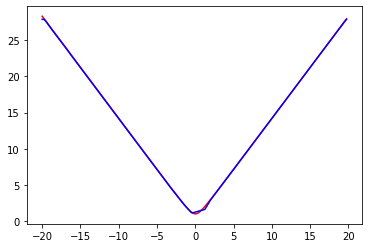

In [24]:
# # Draw target vs prediction
plt.plot(train_x, train_y, 'r')
plt.plot(train_x, predict_y, 'b')
plt.show()

In [ ]:
# # Data for plotting
# t = train_x
# s = train_y

# fig, ax = plt.subplots()
# ax.plot(t, s)

# ax.set(xlabel='train', ylabel='fx',
#        title='non linear')
# ax.grid()

# # fig.savefig("test.png")
# plt.show()